In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/raw_btc_data.csv')

In [3]:
# Convert timestamp columns to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
if 'close_time' in df.columns:
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31665 entries, 0 to 31664
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           31665 non-null  datetime64[ns]
 1   open                31665 non-null  float64       
 2   high                31665 non-null  float64       
 3   low                 31665 non-null  float64       
 4   close               31665 non-null  float64       
 5   volume              31665 non-null  float64       
 6   close_time          31665 non-null  datetime64[ns]
 7   quote_asset_volume  31665 non-null  float64       
 8   num_trades          31665 non-null  int64         
 9   taker_buy_base      31665 non-null  float64       
 10  taker_buy_quote     31665 non-null  float64       
 11  ignore              31665 non-null  int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
memory usage: 2.9 MB


In [4]:
df.set_index('timestamp', inplace=True)

In [25]:
df.shape, df.head()

((31665, 11),
                          open      high       low     close      volume  \
 timestamp                                                                 
 2022-01-01 00:00:00  46216.93  46731.39  46208.37  46656.13  1503.33095   
 2022-01-01 01:00:00  46656.14  46949.99  46574.06  46778.14   943.81539   
 2022-01-01 02:00:00  46778.14  46928.94  46721.96  46811.77   485.16860   
 2022-01-01 03:00:00  46811.77  46916.63  46760.12  46813.20   562.88971   
 2022-01-01 04:00:00  46813.21  46887.33  46591.23  46711.05   861.88389   
 
                                  close_time  quote_asset_volume  num_trades  \
 timestamp                                                                     
 2022-01-01 00:00:00 2022-01-01 00:59:59.999        6.987999e+07       38608   
 2022-01-01 01:00:00 2022-01-01 01:59:59.999        4.412715e+07       31872   
 2022-01-01 02:00:00 2022-01-01 02:59:59.999        2.272067e+07       24364   
 2022-01-01 03:00:00 2022-01-01 03:59:59.999        

In [5]:
bitcoin_prices = pd.DataFrame(df['close']).rename(columns={'close':"price"})
bitcoin_prices.head()

,price
timestamp,
2022-01-01 00:00:00,46656.13
2022-01-01 01:00:00,46778.14
2022-01-01 02:00:00,46811.77
2022-01-01 03:00:00,46813.20
2022-01-01 04:00:00,46711.05


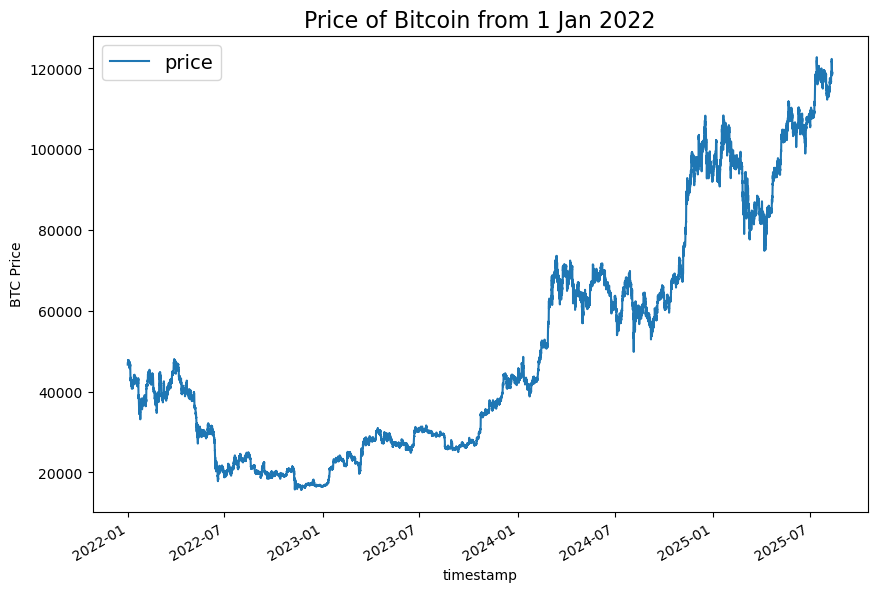

In [6]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Jan 2022", fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [6]:
# Lấy mảng bitcoin date
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2022-01-01T00:00:00.000000000', '2022-01-01T01:00:00.000000000',
        '2022-01-01T02:00:00.000000000', '2022-01-01T03:00:00.000000000',
        '2022-01-01T04:00:00.000000000', '2022-01-01T05:00:00.000000000',
        '2022-01-01T06:00:00.000000000', '2022-01-01T07:00:00.000000000',
        '2022-01-01T08:00:00.000000000', '2022-01-01T09:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([46656.13, 46778.14, 46811.77, 46813.2 , 46711.05, 47192.55,
        46979.62, 47194.73, 47124.82, 47143.98]))

In [7]:
# Tạo train/test split đúng cách cho dữ liệu chuỗi thời gian
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Tạo phân tách dữ liệu huấn luyện (mọi thứ trước khi phân tách)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Tạo phần tách dữ liệu kiểm tra (mọi thứ sau khi phân tách)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(25332, 6333, 25332, 6333)

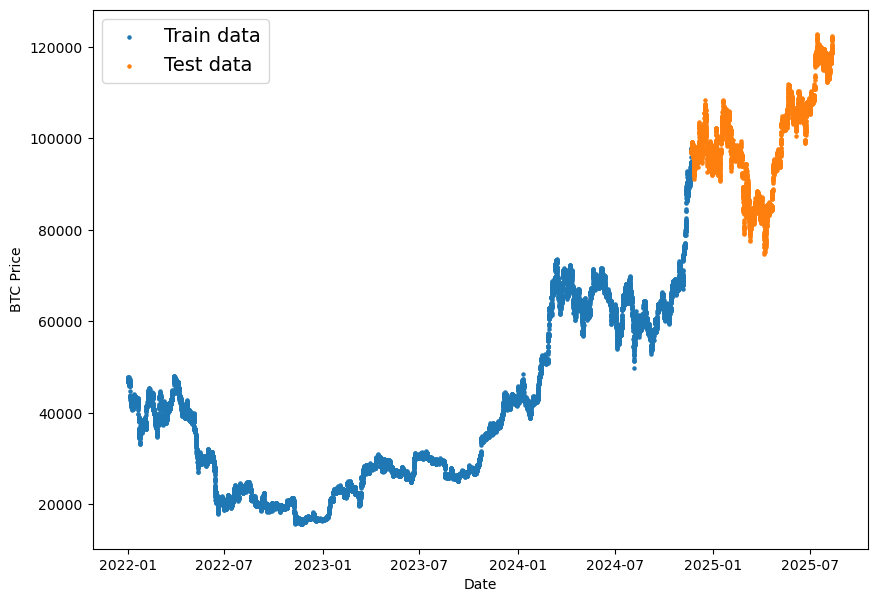

In [8]:
# Biểu đồ tạo các phân tách chính xác
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [9]:
# Tạo một hàm vẽ biểu đồ dữ liệu chuỗi thời gian
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Vẽ biểu đồ các bước thời gian (một loạt các điểm trong thời gian) với các giá trị (một loạt các giá trị trên các bước thời gian).

  Tham số
  ---------
  timesteps : mảng của các bước thời gian
  values : mảng của các giá trị theo theo thời gian
  format : kiểu của biểu đồ, mặc định là "."
  start : nơi bắt đầu biểu đồ (đặt một giá trị sẽ lập chỉ mục từ start của timesteps & values)
  end : nơi kết thúc biểu đồ (đặt một giá trị sẽ lập chỉ mục từ end của timesteps & values)
  label : nhãn để hiển thị trên biểu đồ giá trị
  """
  # Vẽ biểu đồ các chuỗi
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # làm cho nhãn lớn hơn
  plt.grid(True)

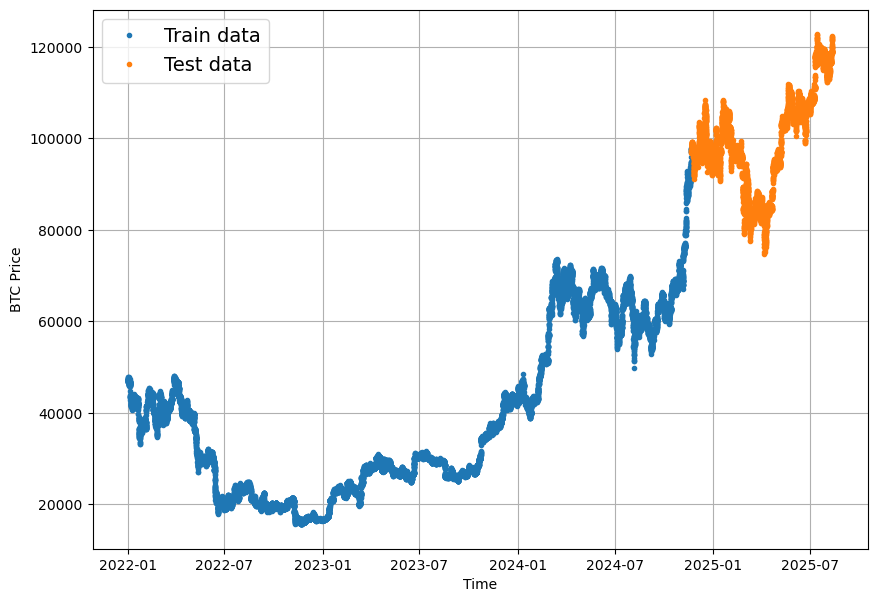

In [9]:
# Hãy thử hàm vẽ biểu đồ
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [10]:
# Tạo a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast bằng mọi giá trị không bao gồm giá trị cuối cùng
naive_forecast[:10], naive_forecast[-10:] # Hiển thị 10 giá trị đầu và 10 giá trị cuối

(array([97512.01, 97042.86, 96672.  , 97147.99, 98048.65, 98280.01,
        97829.83, 98118.16, 97973.8 , 98356.  ]),
 array([118686.  , 118949.31, 118977.1 , 119054.13, 118857.7 , 119067.97,
        118819.99, 118839.97, 118986.72, 118814.7 ]))

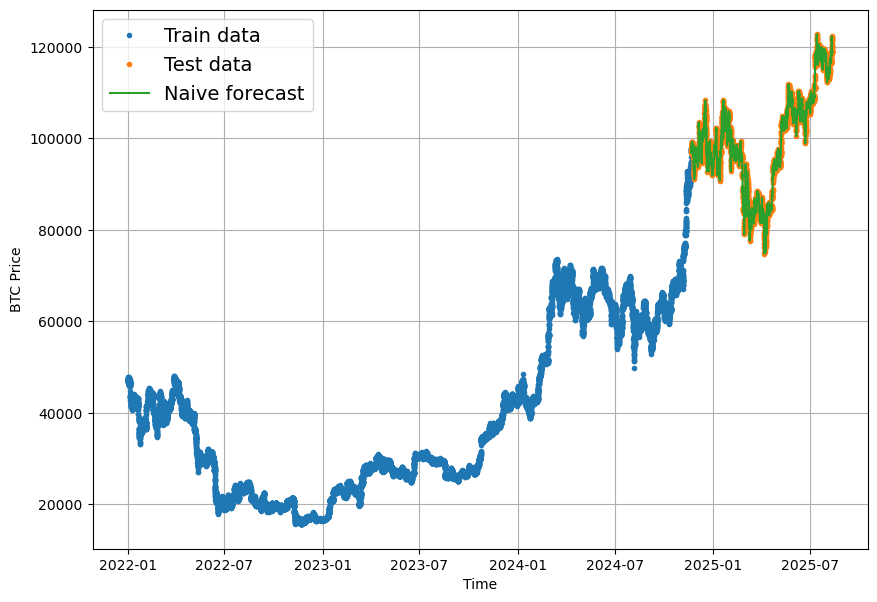

In [11]:
# Vẽ biểu đồ naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

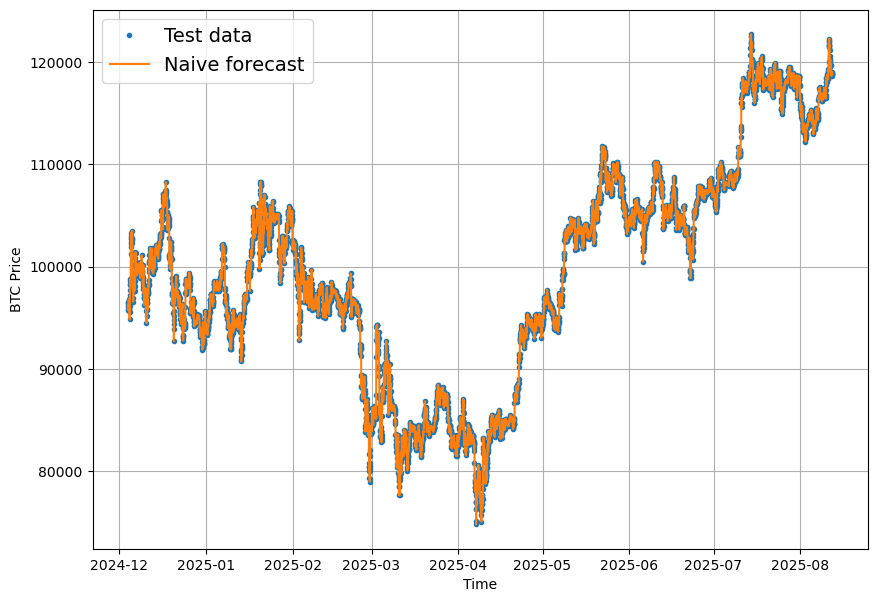

In [12]:
plt.figure(figsize=(10, 7))
offset = 300 # offset các giá trị 300 bước thời gian
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [12]:
# Hãy lấy TensorFlow!
import tensorflow as tf

In [13]:
# MASE đã lập trình sẵn của sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Lập trình MASE (giả sử dữ liệu không có tính thời vụ).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Tìm MAE của naive forecast (không có tính thời vụ)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # tính thời vụ là 1 day (do đó dịch chuyển 1 day)

  return mae / mae_naive_no_season

In [14]:
def evaluate_preds(y_true, y_pred):
  # Đảm bảo float32 (để tính toán phép đo)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Tính toán nhiều phép đo khác nhau
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred) # đặt và nhấn mạnh vào các outlier (tất cả các sai số được bình phương)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [15]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': np.float32(320.13614),
 'mse': np.float32(234859.5),
 'rmse': np.float32(484.62305),
 'mape': np.float32(0.32871366),
 'mase': np.float32(1.0000736)}

In [16]:
HORIZON = 1 # dự đoán từng bước một
WINDOW_SIZE = 7 # sử dụng các bước thời gian có giá trị một tuần để dự đoán horizon

In [17]:
# Tạo hàm gắn nhãn dữ liệu window
def get_labelled_windows(x, horizon=1):
  """
  Tạo nhãn cho tập dữ liệu window.

  Ví dụ: if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [18]:
# Kiểm tra hàm gắn nhãn window
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [19]:
# Tạo hàm để xem mảng NumPy dưới dạng window
def make_windows(x, window_size=7, horizon=1):
  """
  Biến mảng 1D thành mảng 2D gồm các window tuần tự của window_size.
  """
  # 1. Tạo một window có window_size cụ thể (thêm horizon vào cuối để gắn nhãn sau này)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Tạo mảng 2D gồm nhiều bước window (trừ 1 để tính đến 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # tạo mảng 2D có các window với window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Lập chỉ mục trên mảng đích (chuỗi thời gian) với mảng 2D gồm nhiều bước window
  windowed_array = x[window_indexes]

  # 4. Lấy các window được gắn nhãn
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [20]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(31658, 31658)

In [21]:
# Xem 3 window/nhãn đầu tiên
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [46656.13 46778.14 46811.77 46813.2  46711.05 47192.55 46979.62] -> Label: [47194.73]
Window: [46778.14 46811.77 46813.2  46711.05 47192.55 46979.62 47194.73] -> Label: [47124.82]
Window: [46811.77 46813.2  46711.05 47192.55 46979.62 47194.73 47124.82] -> Label: [47143.98]


In [22]:
# Xem 3 window/nhãn cuối
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [118949.31 118977.1  119054.13 118857.7  119067.97 118819.99 118839.97] -> Label: [118986.72]
Window: [118977.1  119054.13 118857.7  119067.97 118819.99 118839.97 118986.72] -> Label: [118814.7]
Window: [119054.13 118857.7  119067.97 118819.99 118839.97 118986.72 118814.7 ] -> Label: [118646.74]


In [23]:
# Tạo phân tách huấn luyện/kiểm tra
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Tách các cặp window và label thành các train/test split.
  """
  split_size = int(len(windows) * (1-test_split)) # điều này mặc định thành 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [24]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(25326, 6332, 25326, 6332)

In [25]:
train_windows[:5], train_labels[:5]

(array([[46656.13, 46778.14, 46811.77, 46813.2 , 46711.05, 47192.55,
         46979.62],
        [46778.14, 46811.77, 46813.2 , 46711.05, 47192.55, 46979.62,
         47194.73],
        [46811.77, 46813.2 , 46711.05, 47192.55, 46979.62, 47194.73,
         47124.82],
        [46813.2 , 46711.05, 47192.55, 46979.62, 47194.73, 47124.82,
         47143.98],
        [46711.05, 47192.55, 46979.62, 47194.73, 47124.82, 47143.98,
         46871.08]]),
 array([[47194.73],
        [47124.82],
        [47143.98],
        [46871.08],
        [46758.87]]))

In [26]:
import os

# Tạo một hàm lập trình ModelCheckpoint callback với filename cụ thể
def create_model_checkpoint(model_name, save_path="..\models"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # tạo filepath để lưu mô hình
                                            verbose=0, # chỉ xuất một lượng văn bản hạn chế
                                            save_best_only=True) # chỉ lưu mô hình tốt nhất vào file

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

# Thiết lập random seed để có kết quả lặp lại nhiều nhất có thể
tf.random.set_seed(42)

# Xây dựng mô hình
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # kích hoạt tuyến tính cũng giống như không có kích hoạt
], name="model_1_dense.keras") # đặt tên cho mô hình để lưu nó

# Biên dịch mô hình
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # chúng ta không nhất thiết cần điều này khi hàm mất mát là MAE

# Khớp mô hình
model_1.fit(x=train_windows, # huấn luyện window có 7 bước thời gian của giá Bitcoin
            y=train_labels, # giá trị horizon là 1 (sử dụng 7 bước thời gian trước đó để dự đoán ngày hôm sau)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # tạo ModelCheckpoint callback để lưu mô hình tốt nhất

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2995.8123 - mae: 2995.8123 - val_loss: 488.5602 - val_mae: 488.5602
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.2429 - mae: 216.2429 - val_loss: 460.9381 - val_mae: 460.9381
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.2423 - mae: 227.2423 - val_loss: 468.6132 - val_mae: 468.6132
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217.3303 - mae: 217.3303 - val_loss: 791.0274 - val_mae: 791.0274
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 233.6288 - mae: 233.6288 - val_loss: 552.9092 - val_mae: 552.9092
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.2815 - mae: 229.2815 - val_loss: 634.6526 - val_mae: 634.6526
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.9697 - mae: 269.9697 - val_loss: 583.4247 - val_mae: 583.4247
Epoch 8/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 211.6107 - mae: 211.6107 - val_loss: 505.2222 - 

In [42]:
# Đánh giá mô hình trên dữ liệu kiểm tra
model_1.evaluate(test_windows, test_labels)

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 436.0500 - mae: 436.0500


[436.050048828125, 436.050048828125]

In [45]:
# Load vào model_1 hoạt động tốt nhất đã lưu và đánh giá trên dữ liệu kiểm tra
model_1 = tf.keras.models.load_model("../models/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 340.5757 - mae: 340.5757


[340.5757141113281, 340.5757141113281]

In [27]:
def make_preds(model, input_data):
  """
  Sử dụng mô hình để đưa ra dự đoán về input_data.

  Tham số
  ----------
  model:  mô hình đã huấn luyện
  input_data: dữ liệu đầu vào ở dạng window (cùng một loại dữ liệu mà mô hình dữ liệu được huấn luyện)

  Trả về các dự đoán của mô hình về input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # trả về mảng 1D của các dự đoán

In [47]:
# Đưa ra dự đoán bằng cách sử dụng model_1 trên tập dữ liệu kiểm tra và xem kết quả
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(6332,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([97502.83 , 97206.93 , 96789.74 , 97045.23 , 97700.11 , 98111.09 ,
        98091.79 , 98173.38 , 97994.984, 98136.555], dtype=float32)>)

In [48]:
# Đánh giá preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # giảm xuống shape phù hợp
                                 y_pred=model_1_preds)
model_1_results

{'mae': np.float32(340.5758),
 'mse': np.float32(266794.0),
 'rmse': np.float32(516.52106),
 'mape': np.float32(0.34956494),
 'mase': np.float32(1.063925)}

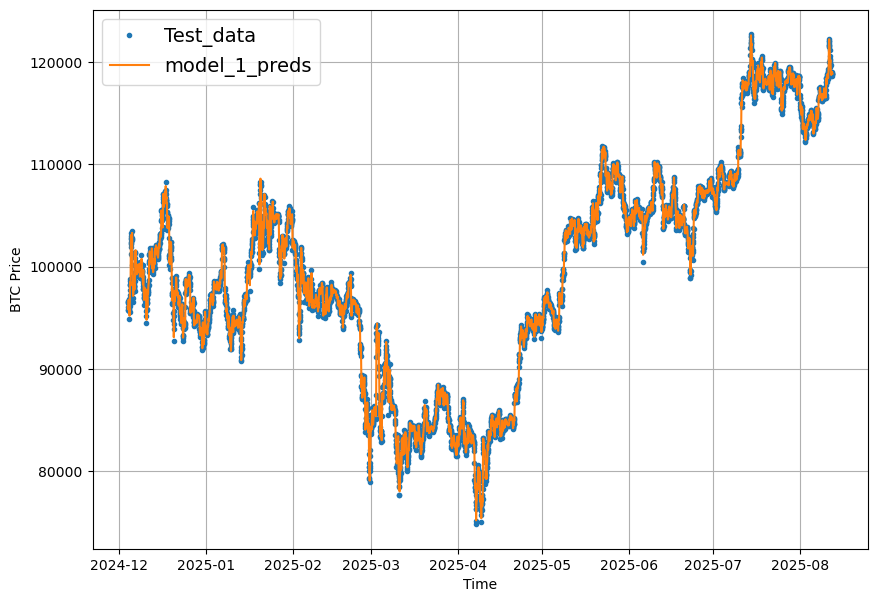

In [49]:
offset = 300
plt.figure(figsize=(10, 7))
# Tính toán test_window offset và lập chỉ mục vào test_labels để đảm bảo vẽ đúng
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [50]:
# Kiểm tra shape của mẫu dữ liệu
train_windows[0].shape # trả về (WINDOW_SIZE, )

(7,)

# Train trên tập dữ liệu đa biến

In [28]:
multi_data = pd.read_csv('data/feature_data.csv')

In [38]:
multi_data.set_index('timestamp', inplace=True)

In [39]:
multi_data.head()

,close,volume,quote_asset_volume,num_trades,taker_buy_base,taker_buy_quote,hour,day_of_week,is_weekend,return,log_return,rolling_mean_close_5,rolling_std_close_5,ema_10,rsi,close_lag_1,close_lag_3
timestamp,,,,,,,,,,,,,,,,,
2022-01-01 13:00:00,47023.24,454.14412,2.137342e+07,23077.0,216.57778,1.019418e+07,13,5,1,-0.001079,-0.001080,46974.244,156.685135,46963.937524,59.136954,47074.05,46871.08
2022-01-01 14:00:00,46926.22,503.66220,2.365685e+07,23020.0,201.28873,9.453984e+06,14,5,1,-0.002063,-0.002065,46930.692,124.712707,46957.079792,56.412545,47023.24,46758.87
2022-01-01 15:00:00,47219.04,1515.95305,7.160524e+07,37411.0,827.63725,3.908877e+07,15,5,1,0.006240,0.006221,47000.284,171.456105,47004.708921,59.682619,46926.22,47074.05
2022-01-01 16:00:00,47268.62,1049.57919,4.972715e+07,36116.0,499.31520,2.365586e+07,16,5,1,0.001050,0.001049,47102.234,140.839679,47052.692753,59.963100,47219.04,47023.24
2022-01-01 17:00:00,47754.48,1320.66577,6.291738e+07,50007.0,665.48923,3.169893e+07,17,5,1,0.010279,0.010226,47238.320,320.693300,47180.290435,66.946931,47268.62,46926.22


In [30]:
multi_data.drop(columns=['open', 'high', 'low', 'close_time'], inplace=True)

In [31]:
multi_data.head()

,timestamp,close,volume,quote_asset_volume,num_trades,taker_buy_base,taker_buy_quote,hour,day_of_week,is_weekend,return,log_return,rolling_mean_close_5,rolling_std_close_5,ema_10,rsi,close_lag_1,close_lag_3
0,2022-01-01 13:00:00,47023.24,454.14412,2.137342e+07,23077.0,216.57778,1.019418e+07,13,5,1,-0.001079,-0.001080,46974.244,156.685135,46963.937524,59.136954,47074.05,46871.08
1,2022-01-01 14:00:00,46926.22,503.66220,2.365685e+07,23020.0,201.28873,9.453984e+06,14,5,1,-0.002063,-0.002065,46930.692,124.712707,46957.079792,56.412545,47023.24,46758.87
2,2022-01-01 15:00:00,47219.04,1515.95305,7.160524e+07,37411.0,827.63725,3.908877e+07,15,5,1,0.006240,0.006221,47000.284,171.456105,47004.708921,59.682619,46926.22,47074.05
3,2022-01-01 16:00:00,47268.62,1049.57919,4.972715e+07,36116.0,499.31520,2.365586e+07,16,5,1,0.001050,0.001049,47102.234,140.839679,47052.692753,59.963100,47219.04,47023.24
4,2022-01-01 17:00:00,47754.48,1320.66577,6.291738e+07,50007.0,665.48923,3.169893e+07,17,5,1,0.010279,0.010226,47238.320,320.693300,47180.290435,66.946931,47268.62,46926.22


In [40]:
X = multi_data.drop('close', axis=1)
Y = multi_data['close']
X.shape, Y.shape

((31652, 16), (31652,))

In [41]:
# Tạo các tập huấn luyện và kiểm tra
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], Y[:split_size]
X_test, y_test = X[split_size:], Y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(25321, 25321, 6331, 6331)

In [42]:
from tensorflow.keras import layers
tf.random.set_seed(42)

# Tạo mô hình chuỗi thời gian đa biến
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # thêm một layer bổ sung ở đây sẽ đánh bại naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate.keras")

# Biên dịch
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Khớp
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # chỉ in 1 dòng mỗi epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [45]:
# Đảm bảo rằng mô hình tốt nhất đã được load và đánh giá
model_6 = tf.keras.models.load_model("../models/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8091.4976


8091.49755859375

In [46]:
# Đưa ra dự đoán về dữ liệu đa biến
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([51138.027, 65768.03 , 71782.03 , 50408.027, 52910.027, 78801.03 ,
       94616.03 , 88191.03 , 84484.53 , 95759.03 ], dtype=float32)>

In [47]:
# Đánh giá preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': np.float32(8091.5),
 'mse': np.float32(332360320.0),
 'rmse': np.float32(18230.752),
 'mape': np.float32(8.331853),
 'mase': np.float32(25.277676)}

In [49]:
HORIZON = 1 # dự đoán về tương lai
WINDOW_SIZE = 7 # xem xét quá khứ

In [51]:
# 1. Biến mảng huấn luyện và kiểm tra thành tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Kết hợp các đặc trưng & nhãn
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch và prefetch cho chất lượng tối ưu
BATCH_SIZE = 1024 # từ Appendix D trong tài liệu N-BEATS
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [52]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Trả về list các mô hình num_iter được huấn luyện trên từng MAE, MSE và MAPE loss.

  Ví dụ: nếu num_iter = 10 sẽ trả về list 30 mô hình được huấn luyện:
  10 * len(["mae", "mse", "mape"]).
  """
  # Tạo list trống cho các ensemble model đã huấn luyện
  ensemble_models = []

  # Tạo số mô hình num_iter cho mỗi hàm mất mát
  for i in range(num_iter):
    # Xây dựng và khớp mô hình mới với một hàm mất mát khác
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Xây dựng một mô hình đơn giản (tương tự như model_1)
      model = tf.keras.Sequential([
        # Khởi tạo các layer với phân phối chuẩn (Gauss) để chúng ta có thể sử dụng các mô hình cho dự đoán
        # ước tính khoảng thời gian sau: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Biên dịch mô hình đơn giản với hàm mất mát hiện tại
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Khớp mô hình
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Thêm callback để ngăn quá trình huấn luyện diễn ra/ngưng trệ quá lâu
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Nối mô hình đã khớp vào danh sách các ensemble model
      ensemble_models.append(model)

  return ensemble_models # trả về danh sách các mô hình đã huấn luyện

In [53]:
%%time
# Nhận danh sách các ensemble model được huấn luyện
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 348: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 640: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 129: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 400: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 500: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 139: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 287: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 207: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 563: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing 

In [54]:
# Tạo một hàm sử dụng danh sách các mô hình đã huấn luyện để tạo và trả về danh sách các dự đoán
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # ưa ra dự đoán với ensemble model hiện tại
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [55]:
# Tạo danh sách các dự đoán ensemble
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


<tf.Tensor: shape=(15, 6331), dtype=float32, numpy=
array([[104590.09 , 101468.09 ,  98806.09 , ..., 119725.09 , 119512.09 ,
        118350.22 ],
       [263500.   , 200555.98 , 109353.984, ...,  32582.988,  28535.988,
         57640.99 ],
       [ 89776.055,  90470.055,  87752.055, ..., 137205.55 , 138244.05 ,
        125722.305],
       ...,
       [ 73159.13 ,  87819.13 ,  94293.38 , ..., 122802.51 , 120376.38 ,
        118012.195],
       [185161.02 , 169723.02 , 119713.016, ...,  78637.64 ,  58172.016,
         60874.453],
       [103128.19 , 100196.19 ,  96568.19 , ..., 113429.19 , 113541.69 ,
        114846.44 ]], dtype=float32)>

In [56]:
# Đánh giá các dự đoán của ensemble model
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # lấy median trên tất cả các dự đoán ensemble
ensemble_results

{'mae': np.float32(2022.8903),
 'mse': np.float32(8178548.0),
 'rmse': np.float32(2859.8162),
 'mape': np.float32(2.0508962),
 'mase': np.float32(6.3194666)}

In [57]:
# Tìm giới hạn trên và giới hạn dưới của các ensemble prediction
def get_upper_lower(preds): # 1. Lấy dự đoán của nhiều mạng nơ-ron học sâu được khởi tạo ngẫu nhiên

  # 2. Đo độ lệch chuẩn của các dự đoán
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Nhân độ lệch chuẩn với 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Lấy giới hạn trên và giới hạn dưới của khoảng thời gian dự đoán
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Lấy giới hạn trên và giới hạn dưới của 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

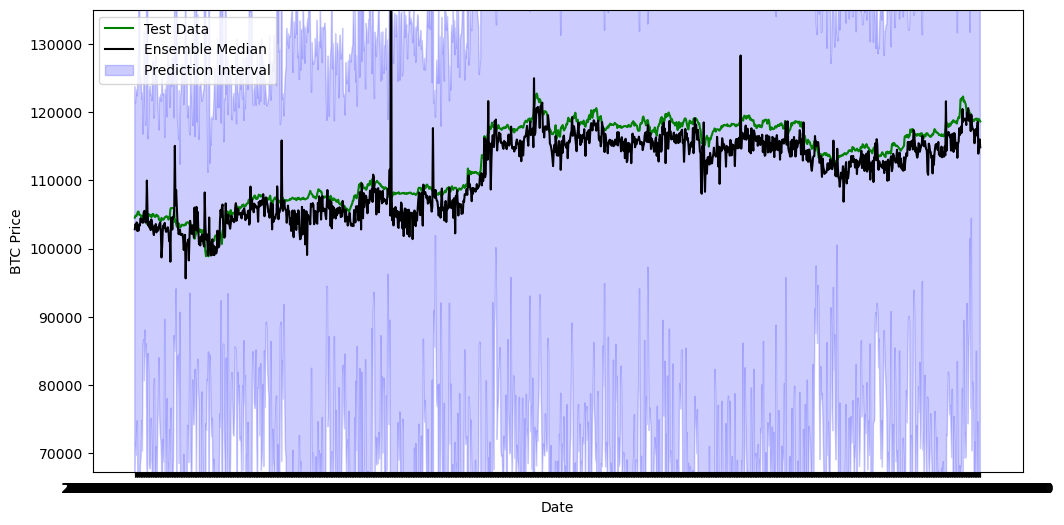

In [60]:
# Nhận các giá trị median của các ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Vẽ đồ thị median của các ensemble preds cùng với các khoảng thời gian dự đoán (trong đó các dự đoán nằm giữa)
offset = 5000
plt.figure(figsize=(12,6))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.fill_between(X_test.index[offset:], lower[offset:], upper[offset:], alpha=0.2, color="blue", label="Prediction Interval")

plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(loc="upper left")
plt.ylim([y_test.min()*0.9, y_test.max()*1.1])  # zoom y-axis to actual range
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
lr_preds = lr.predict(X_test)

In [64]:
# Huấn luyện mô hình trên toàn bộ dữ liệu để đưa ra dự đoán cho ngày tiếp theo
X_all = X.dropna().to_numpy() # chỉ cần giá cả, mô hình tương lai có thể là một mô hình đơn biến
y_all = Y.to_numpy()

In [65]:
# 1. Biến X và y thành các tensor Dataset
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Kết hợp các đặc trưng & nhãn
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch và prefetch cho để tối ưu chất lượng
BATCH_SIZE = 1024 # lấy từ Appendix D trong tài liệu N-BEATS
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 16), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [73]:
tf.random.set_seed(42)

# Tạo mô hình (tốt và đơn giản, chỉ để test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Biên dịch
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Khớp mô hình trên toàn bộ dữ liệu để đưa ra các dự báo tương lai
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # đừng in ra bất cứ điều gì, chúng ta đã thấy những điều này trước đó

In [61]:
# Có bao nhiêu bước để dự đoán tương lai?
INTO_FUTURE = 14 # vì dữ liệu Bitcoin là dữ liệu hàng ngày, để trong 14 ngày

In [62]:
# 1. Tạo hàm đưa ra dự đoán tương lai
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Tạo các bước dự báo trong tương lai into_future sau khi giá trị kết thúc.

  Trả về các dự báo tương lai ở dạng list của các float.
  """
  # 2. Tạo một danh sách rỗng cho các dự báo tương lai/chuẩn bị dữ liệu để dự báo
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # chỉ cần preds từ window trước (điều này sẽ được cập nhật)

  # 3. Tạo INTO_FUTURE số lượng dự đoán, thay đổi dữ liệu được dự đoán mỗi lần
  for _ in range(into_future):

    # Dự đoán dựa trên window trước, sau đó nối lại, một lần nữa, một lần nữa (mô hình bắt đầu đưa ra dự báo trên dự báo của chính nó)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Nối dự đoán vào future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Cập nhật last window với new pred và nhận WINDOW_SIZE các pred gần đây nhất (mô hình đã được huấn luyện trên WINDOW_SIZE window)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [74]:
# Đưa ra dự báo về giá Bitcoin tương lai
# Lưu ý: nếu bạn đọc điều này ở một thời gian sau đó, có thể bạn đang ở tương lai, vì vậy dự báo
# mà chúng ta đang thực hiện có thể không thực sự là dự báo, nếu đúng như vậy, hãy điều chỉnh lại dữ liệu huấn luyện.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_51" is incompatible with the layer: expected axis -1 of input shape to have value 16, but received input with shape (1, 7)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 7), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>